### ゼロから始める株取引！Python／Prophetで株価予測

In [1]:
!python -V

Python 3.8.8


In [2]:
!python -m pip --version

pip 21.3.1 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)


In [3]:
!pip install prophet

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from pandas_datareader.data import DataReader
import datetime

In [5]:
start = datetime.date(2018, 1, 1)
end = datetime.date(2022, 1, 1)

df = DataReader('9983.T', 'yahoo', start, end)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2018-01-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       989 non-null    float64
 1   Low        989 non-null    float64
 2   Open       989 non-null    float64
 3   Close      989 non-null    float64
 4   Volume     989 non-null    float64
 5   Adj Close  989 non-null    float64
dtypes: float64(6)
memory usage: 54.1 KB


In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,44910.0,44910.0,44910.0,44910.0,0.0,43332.296875
2018-01-02,44910.0,44910.0,44910.0,44910.0,0.0,43332.296875
2018-01-03,44910.0,44910.0,44910.0,44910.0,0.0,43332.296875
2018-01-04,46630.0,45510.0,45580.0,46440.0,997900.0,44808.539062
2018-01-05,47100.0,46170.0,46730.0,46840.0,731100.0,45194.488281


In [8]:
df['ds'] = df.index
df = df.rename({'Close':'y'}, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2018-01-01 to 2021-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   High       989 non-null    float64       
 1   Low        989 non-null    float64       
 2   Open       989 non-null    float64       
 3   y          989 non-null    float64       
 4   Volume     989 non-null    float64       
 5   Adj Close  989 non-null    float64       
 6   ds         989 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 61.8 KB


In [10]:
df.head()

,High,Low,Open,y,Volume,Adj Close,ds
Date,,,,,,,
2018-01-01,44910.0,44910.0,44910.0,44910.0,0.0,43332.296875,2018-01-01
2018-01-02,44910.0,44910.0,44910.0,44910.0,0.0,43332.296875,2018-01-02
2018-01-03,44910.0,44910.0,44910.0,44910.0,0.0,43332.296875,2018-01-03
2018-01-04,46630.0,45510.0,45580.0,46440.0,997900.0,44808.539062,2018-01-04
2018-01-05,47100.0,46170.0,46730.0,46840.0,731100.0,45194.488281,2018-01-05


In [11]:
# 不要カラムの削除と並べ替え
df = df[['ds', 'y']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2018-01-01 to 2021-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      989 non-null    datetime64[ns]
 1   y       989 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.2 KB


In [13]:
df.head()

,ds,y
Date,,
2018-01-01,2018-01-01,44910.0
2018-01-02,2018-01-02,44910.0
2018-01-03,2018-01-03,44910.0
2018-01-04,2018-01-04,46440.0
2018-01-05,2018-01-05,46840.0


In [14]:
# 学習データとテストデータの分割
df_train = df.loc[:'2021-01-01']
df_test = df.loc['2021-01-01':]

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2018-01-01 to 2020-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      744 non-null    datetime64[ns]
 1   y       744 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.4 KB


In [16]:
df_train.head()

,ds,y
Date,,
2018-01-01,2018-01-01,44910.0
2018-01-02,2018-01-02,44910.0
2018-01-03,2018-01-03,44910.0
2018-01-04,2018-01-04,46440.0
2018-01-05,2018-01-05,46840.0


In [17]:
df_train.tail()

,ds,y
Date,,
2020-12-24,2020-12-24,85920.0
2020-12-25,2020-12-25,86320.0
2020-12-28,2020-12-28,86900.0
2020-12-29,2020-12-29,90810.0
2020-12-30,2020-12-30,92470.0


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-01-04 to 2021-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      245 non-null    datetime64[ns]
 1   y       245 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [19]:
df_test.head()

,ds,y
Date,,
2021-01-04,2021-01-04,91050.0
2021-01-05,2021-01-05,89170.0
2021-01-06,2021-01-06,86960.0
2021-01-07,2021-01-07,88350.0
2021-01-08,2021-01-08,91730.0


In [20]:
df_test.tail()

,ds,y
Date,,
2021-12-24,2021-12-24,67540.0
2021-12-27,2021-12-27,66360.0
2021-12-28,2021-12-28,66140.0
2021-12-29,2021-12-29,65670.0
2021-12-30,2021-12-30,65310.0


In [21]:
params = {'growth': 'linear',
          'changepoints': None,
          'n_changepoints': 25,
          'changepoint_range': 0.8,
          'yearly_seasonality': 'auto',
          'weekly_seasonality': 'auto',
          'daily_seasonality': 'auto',
          'holidays': None,
          'seasonality_mode': 'additive',
          'seasonality_prior_scale': 10.0,
          'holidays_prior_scale': 10.0,
          'changepoint_prior_scale': 0.05,
          'mcmc_samples': 0,
          'interval_width': 0.80,
          'uncertainty_samples': 1000,
          'stan_backend': None
         }

# Prophet 予測モデル構築
df_prophet_model = Prophet(**params)
df_prophet_model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [22]:
len(df_test)

245

In [23]:
# Prophet 予測モデルの精度検証用データの生成
df_future = df_prophet_model.make_future_dataframe(periods=len(df_test), freq='d')
df_pred = df_prophet_model.predict(df_future)

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [24]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      989 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [25]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          989 non-null    datetime64[ns]
 1   trend                       989 non-null    float64       
 2   yhat_lower                  989 non-null    float64       
 3   yhat_upper                  989 non-null    float64       
 4   trend_lower                 989 non-null    float64       
 5   trend_upper                 989 non-null    float64       
 6   additive_terms              989 non-null    float64       
 7   additive_terms_lower        989 non-null    float64       
 8   additive_terms_upper        989 non-null    float64       
 9   weekly                      989 non-null    float64       
 10  weekly_lower                989 non-null    float64       
 11  weekly_upper                989 non-null    float64       

In [26]:
df_pred['yhat']

0       48462.181251
1       48507.905986
2       48468.177681
3       48246.973732
4       48358.362817
           ...      
984    102695.677802
985    103034.575302
986    102576.370539
987    103039.385554
988    103394.531876
Name: yhat, Length: 989, dtype: float64

In [27]:
type(df_pred['yhat'])

pandas.core.series.Series

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


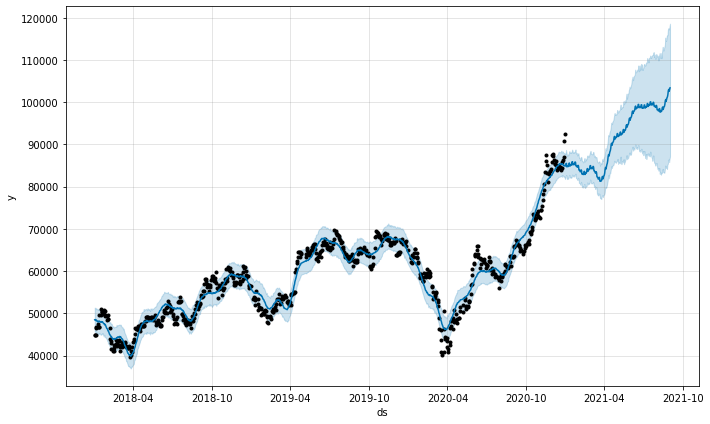

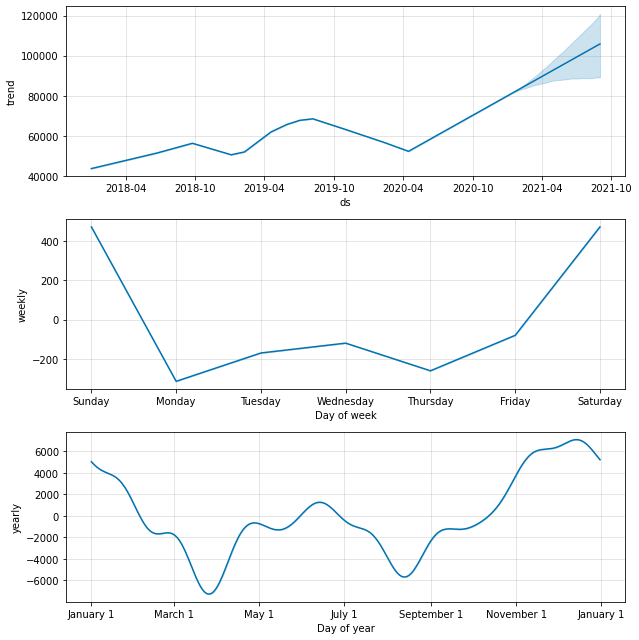

In [28]:
# Prophet 予測モデルの予測結果（学習データ期間＋テストデータ期間）
df_pred_plot = df_prophet_model.plot(df_pred)         #予想値（黒い点は学習データの実測値）
df_pmpc = df_prophet_model.plot_components(df_pred)   #モデルの要素分解（トレンド、週周期、年周期）

In [29]:
# テストデータに予測値を結合
df_test.loc[:, 'Prophet Predict'] = df_pred['yhat'][-245:].to_list()

<ipython-input-29-c9248e728de7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:, 'Prophet Predict'] = df_pred['yhat'][-245:].to_list()


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-01-04 to 2021-12-30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ds               245 non-null    datetime64[ns]
 1   y                245 non-null    float64       
 2   Prophet Predict  245 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.7 KB


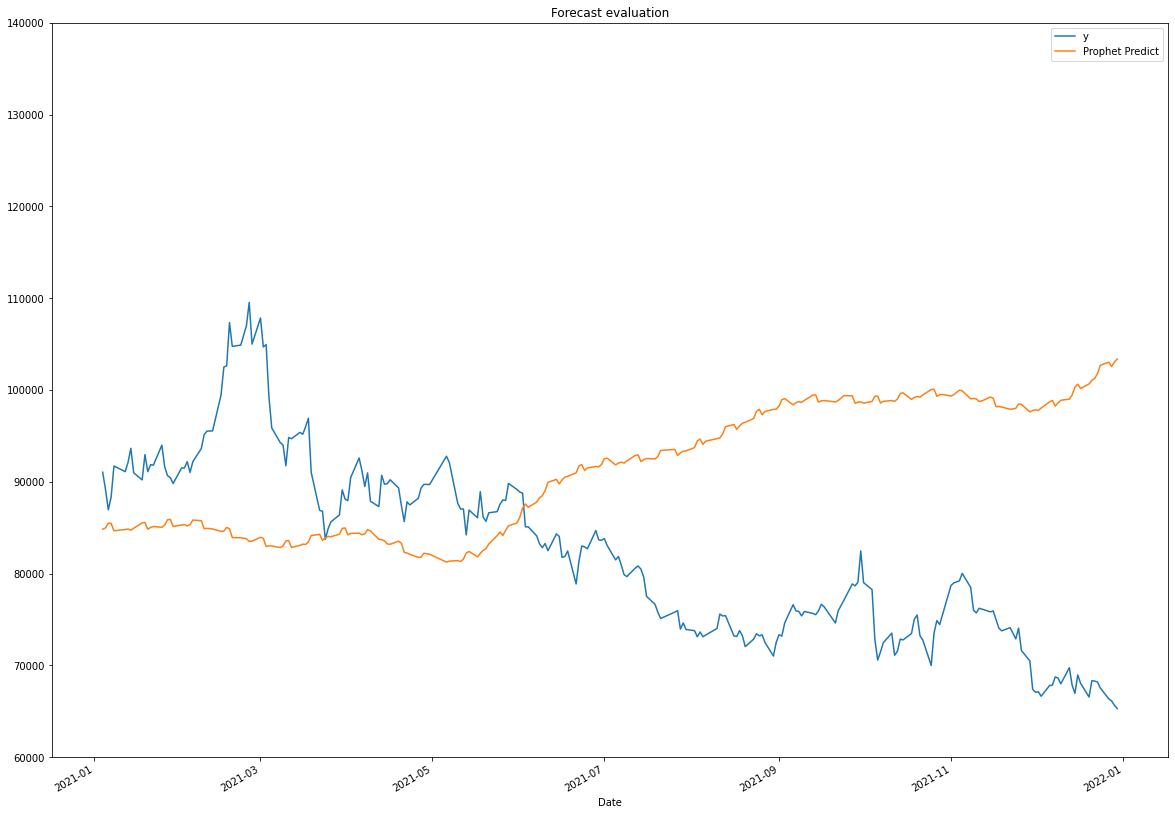

In [31]:
plt.figure(figsize=[20, 15])

# 実測データと予測データの折れ線グラフを描画
df_test['y'].plot(title='Forecast evaluation', kind='line')
df_test['Prophet Predict'].plot(title='Forecast evaluation', kind='line')

# グラフの凡例を設定
plt.legend(['y', 'Prophet Predict'])

# x軸の範囲を変更する
#plt.xlim('2021-10-01', '2021-12-31')
# y軸の範囲を変更する
plt.ylim(60000, 140000)

# グラフの表示
plt.show()